![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import json

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [5]:
DATA_DIR = ''
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [9]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [10]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [14]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
23154,id_2236,Milan,"['Bar', 'Italian', 'Cafe', 'European']",2238.0,$$ - $$$,103.0,"[['Happy hour experience', 'Lovely place'], ['...",/Restaurant_Review-g187849-d4697676-Reviews-Mo...,d4697676,1,4.0
33735,id_586,Luxembourg,NaN,587.0,NaN,2.0,"[['(they have food???)', 'The scandinavian Pla...",/Restaurant_Review-g190356-d795523-Reviews-The...,d795523,1,3.0
27393,id_9435,London,NaN,9444.0,NaN,NaN,"[['Creative.'], ['05/26/2014']]",/Restaurant_Review-g186338-d6601390-Reviews-El...,d6601390,1,5.0
42412,id_1814,Copenhagen,"['Bar', 'American', 'Pub']",1819.0,$$ - $$$,118.0,"[['Good food, but the service totally spoils.....",/Restaurant_Review-g189541-d3411721-Reviews-Bu...,d3411721,1,3.0
20549,id_9021,Paris,NaN,9023.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187147-d13313707-Reviews-B...,d13313707,1,4.5


In [15]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [16]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [17]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [18]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [19]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [20]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [21]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
3790,id_3790,['French'],995.0,NaN,4.0,"[['Special Treat'], ['08/31/2015']]",/Restaurant_Review-g188057-d7721024-Reviews-Bo...,d7721024,0,0.0,...,0,0,0,0,0,0,0,0,0,0
35665,id_2545,"['Vegetarian Friendly', 'Vegan Options']",2546.0,$,96.0,"[['Great New Addition to San Giovanni', 'Do no...",/Restaurant_Review-g187791-d12067633-Reviews-G...,d12067633,1,4.0,...,0,0,0,0,1,0,0,0,0,0
5314,id_5314,"['Italian', 'Cafe']",1652.0,$,79.0,"[['Awesome food and wine', 'Great Piemontese d...",/Restaurant_Review-g187849-d10886266-Reviews-L...,d10886266,0,0.0,...,0,0,0,0,0,0,0,0,0,0
49034,id_5025,"['Mediterranean', 'Spanish', 'Fusion', 'Diner']",5028.0,$$ - $$$,26.0,"[['Outstanding service', 'Great find'], ['06/2...",/Restaurant_Review-g187514-d12327846-Reviews-R...,d12327846,1,4.0,...,0,0,0,0,0,0,0,0,0,0
5560,id_5560,NaN,9646.0,NaN,3.0,"[['Cozy cafe by Gosia!', 'Super little cafe.']...",/Restaurant_Review-g186338-d12207593-Reviews-B...,d12207593,0,0.0,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [23]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [24]:
# Ваша обработка 'Price Range'

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [25]:
# тут ваш код на обработку других признаков
# .....

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

<AxesSubplot:>

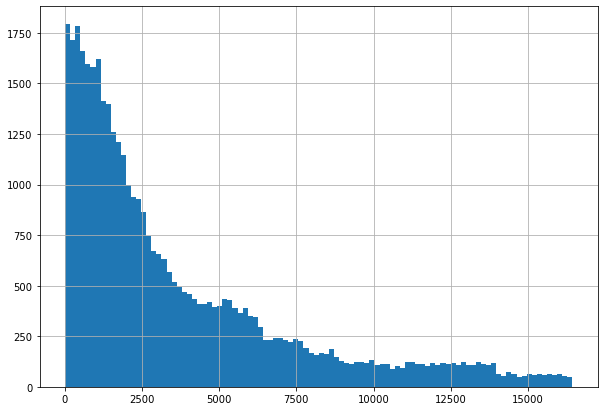

In [26]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

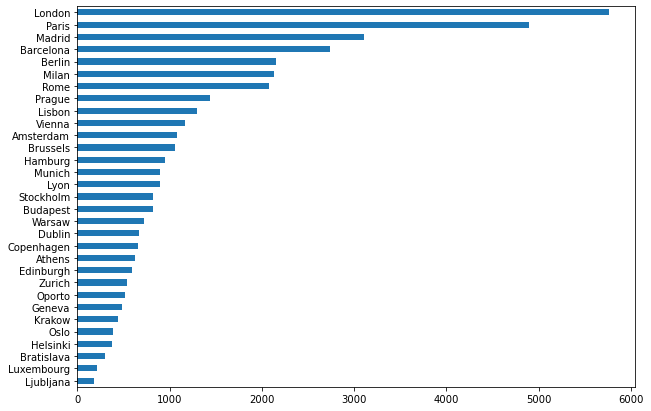

In [27]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

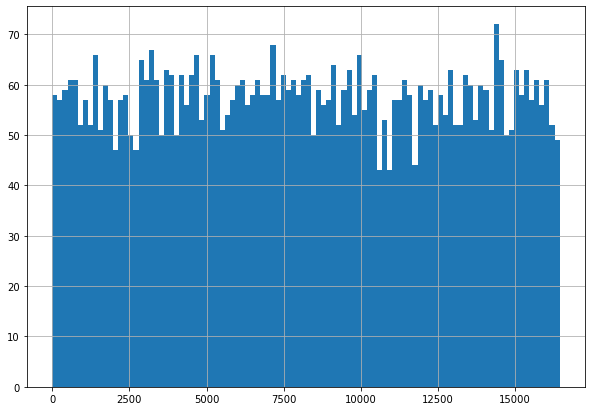

In [28]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

In [29]:
# Нормируем ранк ресторана относительно максимального ранга в его городе
city_max_rank=df_train[['Ranking','City']].groupby(by='City').max()
city_max_rank.columns=['max_rank']
df_train=df_train.merge(city_max_rank, how='left', on='City')
df_train['Ranking']=df_train['Ranking']/df_train['max_rank']


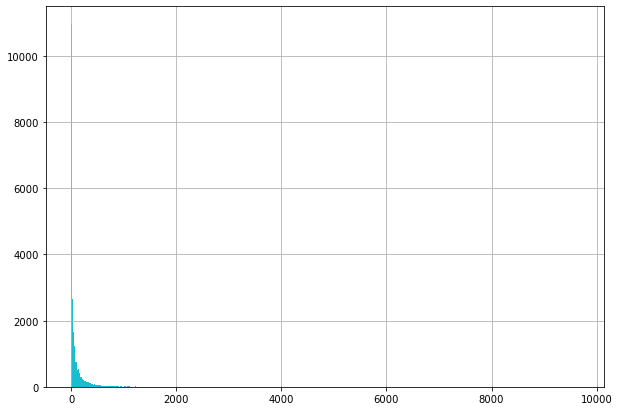

In [30]:
# посмотрим на топ 10 городов

for x in (df_train['City'].value_counts())[0:10].index:
#     df_train['Ranking'][df_train['City'] == x].hist(bins=100)
    df_train['Number of Reviews'][(df_train['City'] == x) & df_train['Number of Reviews']<200 ].hist(bins=1000)
plt.show()

# sns.pairplot(df_train[['Ranking','Rating']])

<AxesSubplot:>

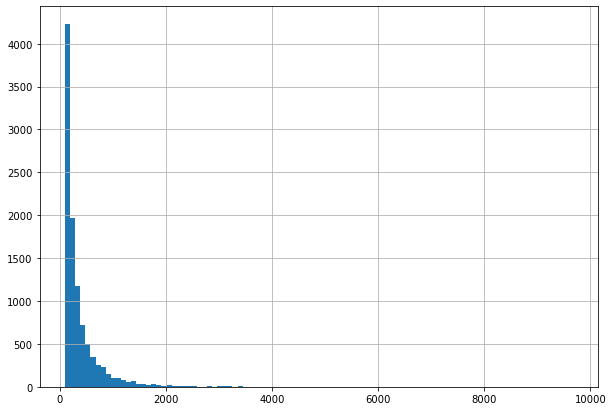

In [31]:
df_train['Number of Reviews'][(df_train['Number of Reviews'] > 100) ].hist(bins=100)

In [32]:
df_train['Number of Reviews'].value_counts().sort_values(ascending=False)

2.0       1916
3.0       1636
4.0       1370
5.0       1181
6.0       1018
          ... 
952.0        1
1507.0       1
1040.0       1
1487.0       1
995.0        1
Name: Number of Reviews, Length: 1459, dtype: int64

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

<AxesSubplot:>

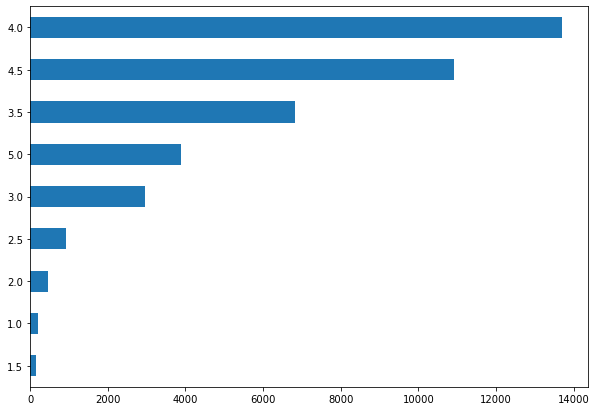

In [33]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

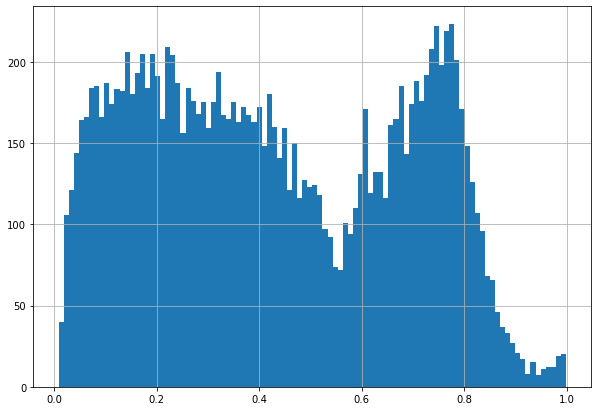

In [34]:
df_train['Ranking'][df_train['Rating'] == 4].hist(bins=100)

<AxesSubplot:>

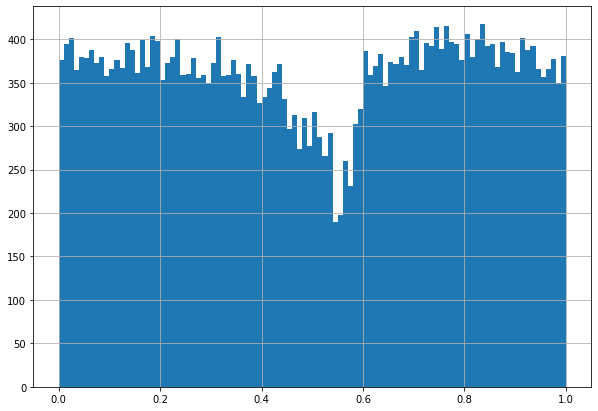

In [35]:
df_train['Ranking'][df_train['Rating'] < 5].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

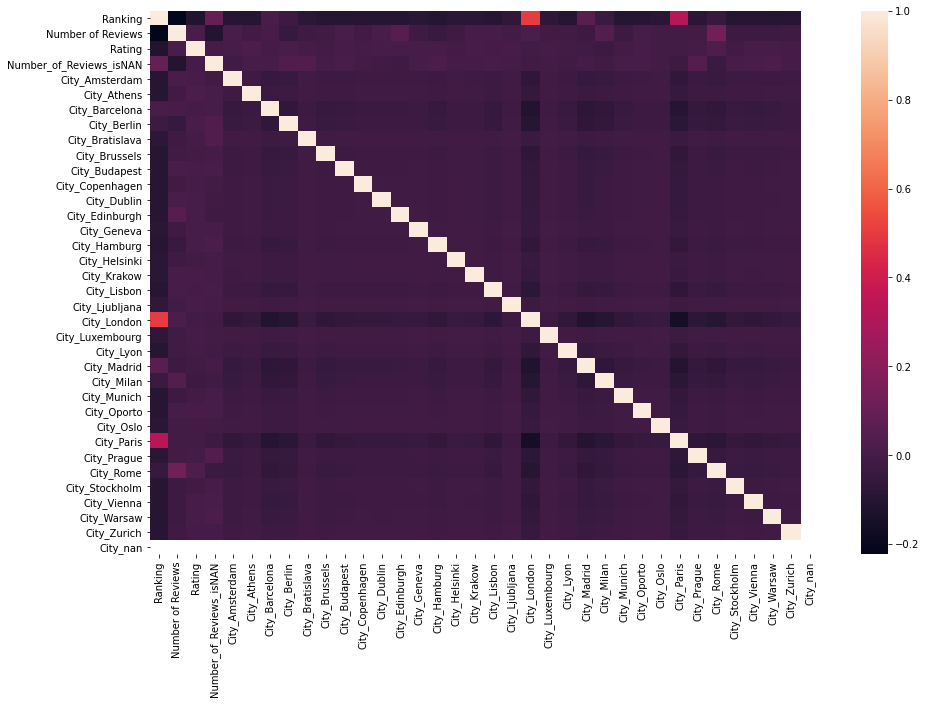

In [36]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [862]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

# загружаем список городов
df_cities = pd.read_csv(DATA_DIR+'cities15000.csv')
df_cities = df_cities[['asciiname','population']]

# загружаем список позитивных и негативных слов 
df_positive = pd.read_csv(DATA_DIR+'positive-words.txt')
df_negative = pd.read_csv(DATA_DIR+'negative-words.txt')



### Функции, которые я использовал для обработки данных

In [863]:
"""Функция для распарсивания отзывов. Ловим много ошибок в строках."""
# не использовал регулярные выражения, т.к. с ними провозился еще дольше, т.к. для вылавливания ошибок с ними было трудней
def parse_reviews_stage1(rev):
    ''' Получаем reviews в формате:
    review['reviews_txt'][1] - тексты обзоров
    review['reviews_dt'][1] - даты обзоров
    '''
    if  not pd.isna(rev): 
        # избавляемся от всех неправильных символов
        rev = str(rev).replace("\\\\",'-')

        rev = str(rev).replace("\\'",'-')
        rev = str(rev).replace("\\x7f",'-')
        rev = str(rev).replace("\\xa0",'-')
        rev = str(rev).replace("', nan]",'!@, !@ !@]')
        rev = str(rev).replace("[nan, '",'[!@ !@, !@')

        rev = str(rev).replace("['",'[!@')
        rev = str(rev).replace("[\"",'[!@')
        rev = str(rev).replace("', '",'!@, !@')
        rev = str(rev).replace("\", '",'!@, !@')

        rev = str(rev).replace("', \"",'!@, !@')
        rev = str(rev).replace("\", \"",'!@, !@')
        rev = str(rev).replace("']",'!@]')
        rev = str(rev).replace("\"]",'!@]')
        
        rev = str(rev).replace("'",'-')
        rev = str(rev).replace("\"",'-')
        
        rev = str(rev).replace("!@",'\"')
        
        rev = rev.replace('], [', '], "reviews_dt": [')
        rev = '{ "reviews_txt":' + rev + '}'
        rev = rev.replace('[[','[').replace(']]',']')

    return rev

def parse_reviews(rev):
    ''' Получаем reviews в формате:
    review['reviews_txt'][1] - тексты обзоров
    review['reviews_dt'][1] - даты обзоров
    '''
    if  not pd.isna(rev): 
        # парсим получившуюся строку в объекты словарь и список
        d = json.loads(parse_reviews_stage1(rev))
        
        # получаем дату отзыва.
        d['reviews_dt'] = [dt.datetime.strptime(date, '%m/%d/%Y').date() if len(date.split('/')[2])==4 else dt.datetime.strptime(date, '%m/%d/%y').date() for date in d['reviews_dt']]
        return d
    else:
        return {}

    
#подсчет плохих и хороших слов в отзывах
def rew_words_count(words_series, review_series, count_column_name):
    word_arr=list(words_series)
    word_cnt_arr=[]
    for s1 in review_series:
        word_count=0

        for w in word_arr:
            if w.lower() in s1.lower(): word_count += 1

        word_cnt_arr.append(word_count)

    df_output[count_column_name]=word_cnt_arr


### Функция обработки данных

In [864]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['ID_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    data['Cuisine Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')
    df_output['Cuisine Style'].fillna(value="['Home kitchen123']", inplace=True)
    

 
    # ################### 3. Encoding ############################################################## 
    ##########
    """Нормируем ранк ресторана относительно максимального ранга в его городе"""
    city_max_rank=df_output[['Ranking','City']].groupby(by=['City']).max()
    city_max_rank.columns=['max_rank']
    df_output=df_output.merge(city_max_rank, how='left', on=['City'])
    df_output['Ranking2']=df_output['Ranking']/df_output['max_rank']
    df_output.drop(['Ranking'], axis = 1, inplace=True)
    ##########
    
    
    ##########
    """Подсчитываем количество видов кухонь, которые есть в ресторане"""
    cousine_cnt=[]
    cousine_parsed=[]
    for s1 in df_output['Cuisine Style']:
        if pd.isna(s1): s1='[]'
        cousine_cnt.append(len(json.loads(str(s1).replace("'",'"'))))
        cousine_parsed.append(json.loads(str(s1).replace(" ","").replace("'",'"')))

    df_output['Cuisine_count']=cousine_cnt   # Количество кухонь записываем в новый столбец
    df_output['cousine_parsed']=cousine_parsed # Распарсенные названия
    df_output2=pd.get_dummies(df_output['cousine_parsed'].apply(pd.Series).stack()).sum(level=0)
    
    object_columns = [s for s in df_output2.columns if df_output2[s].sum() > 100]
    df_output2.drop(object_columns, axis = 1, inplace=True)
    df_output.drop(['Cuisine Style'], axis = 1, inplace=True)

    df_output=df_output.join(df_output2)

    ##########
    
    
    ##########
    """Указываем, является ресторан сетевым или отдельным"""
    rest_franshiza=df_output['Restaurant_id'].value_counts()[df_output['Restaurant_id'].value_counts()>1]
    df_output['set_rest']=df_output['Restaurant_id'].isin(rest_franshiza.index).apply(lambda x: 1 if x==True else 0)
    df_output = pd.get_dummies(df_output, columns=[ 'set_rest'])
    
    """Проставляем вместо диапазона цен числовые аналоги и заполняем пустые значения средним значением по городу внутри рейтинга"""
    data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
    df_output['Price Range'] = df_output['Price Range'].replace(['$','$$ - $$$','$$$$'], [1,2,3]).astype(float)
    city_price_range=df_output[['Price Range','City']].groupby(by=['City']).mean()

    city_price_range.columns=['city_price_range']
    df_output=df_output.merge(city_price_range, how='left', on=['City'])
    df_output['Price Range'].fillna(df_output['city_price_range'], inplace=True) 

    df_output['Price Range2']=df_output['Price Range']
    # раскидываем получившиеся ценовые диапазоны, в том числе и средние, на новые столбцы
    df_output = pd.get_dummies(df_output, columns=['Price Range'], dummy_na=True)
    
   
    """для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na"""
    df_output['City2']=df_output['City']
    df_output = pd.get_dummies(df_output, columns=[ 'City2',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....

    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    """Добавляем население городов и нормируем им количество отзывов"""
    #добавляем в наш датасет население городов
    df_cities.drop_duplicates(['asciiname'], inplace=True)
    df_output=df_output.merge(df_cities, how='left', left_on=['City'], right_on=['asciiname'])

    # двух городов не оказалось в датасете
    df_cities2=pd.DataFrame(data={'asciiname2': ['Edinburgh', 'Oporto'], 'population2': [488000, 287591]})
    
    df_output=df_output.merge(df_cities2, how='left', left_on=['City'], right_on=['asciiname2'])
    df_output['population'].fillna(value=df_output['population2'], inplace=True)
    df_output.drop(['asciiname', 'asciiname2','population2'], axis = 1, inplace=True)
    df_output['population']=df_output['population'].astype(int)
    df_output['Number of Reviews2']=df_output['Number of Reviews']/df_output['population']
    
  
    """Парсим отзывы"""
    # парсим строки отзывов в списки с словари и записываем их в столбцы нашего датафрейма    
    data['Reviews_isNAN'] = df_output['Reviews'].apply(lambda x: 1 if x=='[[], []]' else 0)
    
    rew_array=[]
    for s1 in df_output['Reviews']:
        try:
            rew_array.append(parse_reviews(s1))
        except:
            print(s1, parse_reviews_stage1(s1)) # это для поиска строк, на которых парсер падает, и для добавления новых условий замены символов

    df_output['reviews_txt']=pd.DataFrame(rew_array, columns=['reviews_txt'], dtype='datetime64[ns]').astype(str)
    df_output['reviews_dt']=pd.DataFrame(rew_array, columns=['reviews_dt'], dtype='datetime64[ns]')
    
    
    # вычисляем количества плохих и хороших слов (долго выполняется)
    rew_words_count(df_positive['positive_words'],df_output['reviews_txt'],'good_word_cnt')
    rew_words_count(df_negative['negative_words'],df_output['reviews_txt'],'bad_word_cnt')

    # вычисляем дату последнего отзыва и количество дней между отзывами     
    df_output['lastReviewDate'] = df_output['Reviews'].apply(lambda x: parse_reviews(x)['reviews_dt'] if not pd.isna(x) else {})
    df_output['day_between_rew'] = df_output['lastReviewDate'].apply(lambda x: abs(x[1]-x[0]).total_seconds()//86400 if len(x)>1 else 100000)
    df_output['lastReviewDate'] = df_output['lastReviewDate'].apply(lambda x: sorted(x,reverse=True)[0] if len(x)!=0 else pd.NaT)
    df_output['lastReviewDate'] = df_output['lastReviewDate'].fillna(dt.date(1950,1,1))
    df_output['lastReviewDate'] = df_output['lastReviewDate'].apply(lambda x: (dt.datetime.now().date()-x).total_seconds()//86400)

    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
#     df_output.join(df_output2)

    return df_output


>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [865]:

df_preproc = preproc_data(data)

df_preproc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 134 entries, Number of Reviews to day_between_rew
dtypes: float64(9), int32(1), int64(2), uint8(122)
memory usage: 10.6 MB


In [866]:
df_preproc.sample(10)

,Number of Reviews,sample,Rating,max_rank,Ranking2,Cuisine_count,Afghani,Albanian,Arabic,Armenian,...,City2_Rome,City2_Stockholm,City2_Vienna,City2_Warsaw,City2_Zurich,City2_nan,population,Number of Reviews2,lastReviewDate,day_between_rew
2929,40.0,0,0.0,13986.0,0.671529,1,0,0,0,0,...,0,0,0,0,0,0,2138551,0.000019,2027.0,1051.0
24121,25.0,1,5.0,8809.0,0.235668,2,0,0,0,0,...,0,0,0,0,0,0,50437,0.000496,1561.0,107.0
16715,0.0,1,5.0,16444.0,0.550049,1,0,0,0,0,...,0,0,0,0,0,0,346765,0.000000,26216.0,100000.0
10432,125.0,1,4.5,1964.0,0.110489,5,0,0,0,0,...,0,0,0,0,0,0,1153615,0.000108,1375.0,4.0
7434,1871.0,0,0.0,5948.0,0.045730,7,0,0,0,0,...,1,0,0,0,0,0,2318895,0.000807,1422.0,34.0
33079,636.0,1,4.0,16444.0,0.120591,5,0,0,0,0,...,0,0,0,0,0,0,346765,0.001834,1376.0,13.0
12890,43.0,1,1.5,8809.0,0.988194,5,0,0,0,0,...,0,0,0,0,0,0,50437,0.000853,2055.0,100000.0
6567,27.0,0,0.0,13986.0,0.879665,1,0,0,0,0,...,0,0,0,0,0,0,2138551,0.000013,1548.0,124.0
29100,12.0,1,3.5,8809.0,0.604836,1,0,0,0,0,...,0,0,0,0,0,0,50437,0.000238,1944.0,100000.0
22209,343.0,1,4.0,1601.0,0.039350,5,0,0,0,0,...,0,0,0,0,1,0,341730,0.001004,1402.0,6.0


In [867]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)


**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [868]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [869]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 133), (40000, 133), (40000, 132), (32000, 132), (8000, 132))

In [870]:
y_test

array([5. , 5. , 4. , ..., 4.5, 4. , 4. ])

In [871]:

# X_test.drop(['max_rating_rank','Ranking_rat',], axis = 1, inplace=True)
# X_test.info()

# Model 
Сам ML

In [872]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [873]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [874]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [875]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.19985


<AxesSubplot:>

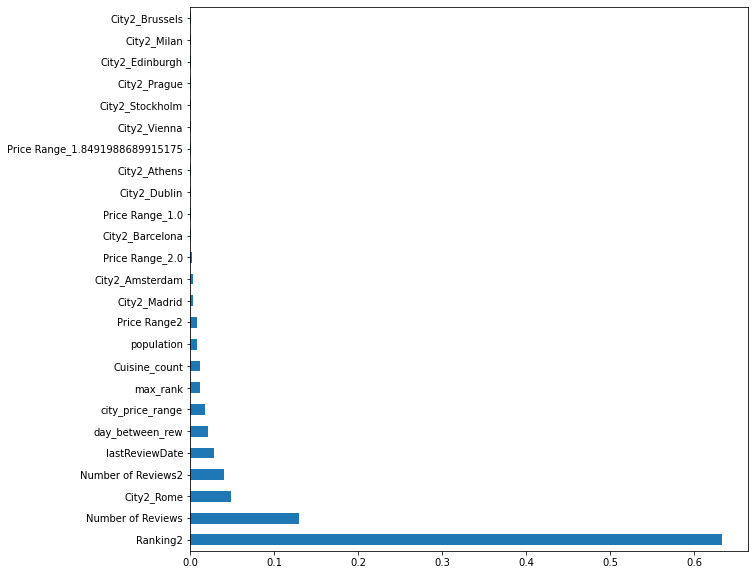

In [876]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [877]:
test_data.sample(10)

,Number of Reviews,Rating,max_rank,Ranking2,Cuisine_count,Afghani,Albanian,Arabic,Armenian,Australian,...,City2_Rome,City2_Stockholm,City2_Vienna,City2_Warsaw,City2_Zurich,City2_nan,population,Number of Reviews2,lastReviewDate,day_between_rew
5381,311.0,0.0,3717.0,0.054076,6,0,0,0,0,0,...,0,0,0,0,0,0,517802,0.000601,1353.0,2.0
9458,5.0,0.0,1141.0,0.846626,1,0,0,0,0,0,...,0,0,0,0,0,0,558457,0.000009,1629.0,100000.0
4449,208.0,0.0,1766.0,0.304077,4,0,0,0,0,0,...,0,0,0,0,0,0,488000,0.000426,1444.0,19.0
8895,21.0,0.0,2440.0,0.807377,1,0,0,0,0,0,...,0,0,0,0,0,0,1741041,0.000012,1377.0,75.0
724,287.0,0.0,13986.0,0.569784,2,0,0,0,0,0,...,0,0,0,0,0,0,2138551,0.000134,1456.0,17.0
6163,127.0,0.0,16444.0,0.176721,5,0,0,0,0,0,...,0,0,0,0,0,0,346765,0.000366,1384.0,24.0
5510,3426.0,0.0,1964.0,0.017312,15,0,0,0,0,0,...,0,0,0,0,0,0,1153615,0.002970,1371.0,3.0
2642,8.0,0.0,1787.0,0.890319,1,0,0,0,0,0,...,0,0,0,0,0,0,664046,0.000012,1443.0,465.0
4744,267.0,0.0,16444.0,0.301812,4,0,0,0,0,0,...,0,0,0,0,0,0,346765,0.000770,1405.0,57.0
2585,32.0,0.0,1960.0,0.408673,4,0,0,0,0,0,...,0,0,0,0,0,0,1024027,0.000031,1377.0,134.0


In [878]:
test_data = test_data.drop(['Rating'], axis=1)

In [879]:
sample_submission

,Restaurant_id,Rating
0,id_0,3.105
1,id_1,4.205
2,id_2,4.415
3,id_3,4.315
4,id_4,4.480
...,...,...
9995,id_9995,4.525
9996,id_9996,4.190
9997,id_9997,3.110
9998,id_9998,4.485


In [880]:
predict_submission = model.predict(test_data)
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')
sample_arr=np.array(sample_submission['Rating'])
predict_submission
print('MAE:', metrics.mean_absolute_error(sample_arr, predict_submission))

MAE: 1.411565


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [881]:
predict_submission

array([3.11 , 4.18 , 4.41 , ..., 3.115, 4.475, 4.28 ])

In [882]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.110
1,id_1,4.180
2,id_2,4.410
3,id_3,4.315
4,id_4,4.475
5,id_5,4.495
6,id_6,1.395
7,id_7,3.285
8,id_8,4.235
9,id_9,4.660


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!


In [883]:
datetime.datetime.fromtimestamp(int(os.path.getmtime('submission.csv')))

NameError: name 'datetime' is not defined